<a href="https://colab.research.google.com/github/pcarbo/qBio9_stuff/blob/main/dataviz_qbio9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Data visualization tutorial: exploring data and telling stories using ggplot2</h1>

Peter Carbonetto<br>
University of Chicago<br>
Chicago, IL<br>

*Last modified on August 24, 2023*

In this lesson, we will learn how to use ggplot2 to create simpley
yet effective data visualizations. The ggplot2 package is an incredibly
powerful plotting interface that extends the base plotting functions in
R.

Some motivation
===============

A good figure is an important part of an impactful research paper or
presentation. A good figure is one that *tells an interesting story.*

Almost inevitably, creating a good figure takes iteration and
refinement. You will rarely get it right on the first try.

For these reasons, taking the *programmatic approach* to creating
plots is very powerful. It allows you to:

a. Create an endless variety of plots.

b. Reuse code to quickly create and revise plots.

In this tutorial we will explore the programmatic approach to plotting
using **ggplot2**.

Setup
=====

*Do I have what I need?* Download the tutorial materials from GitHub, and make sure you know where to find them.

If you have not already done so, install these packages:

In [ ]:
install.packages("ggplot2")
install.packages("cowplot")
install.packages("ggrepel")
install.packages("htmlwidgets")
install.packages("plotly")

I run this every time in Jupyter notebook or Google Colab to make the code outputs look like they do in RStudio.

In [2]:
options(jupyter.rich_display = FALSE)

Do smaller dogs live longer?
============================

The study of dogs is a surprisingly fruitful area of research! In this
tutorial, we will make use of some data that was made available by the
authors of a 2008 *Genetics* article,
*Single-nucleotide-polymorphism-based association mapping of dog
stereotypes.* These data are stored in a CSV file.

Our main analysis aim is to investigate the anecdotal claim that
smaller breeds (such as Chihuahuas) live longer than larger breeds
(such as Saint Bernards).

Our first ggplot plot
---------------------

It will take us some time to understand *how* ggplot works, but let's
start by quickly creating our first ggplot.

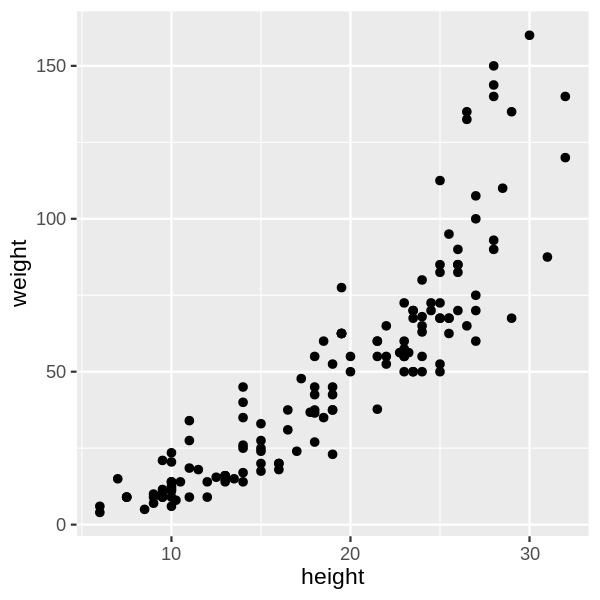

In [6]:
library(ggplot2)
options(repr.plot.width = 4,repr.plot.height = 4,repr.plot.res = 150)
system("wget https://raw.githubusercontent.com/pcarbo/qBio9_stuff/main/dogs.csv")
dogs <- read.csv("dogs.csv",stringsAsFactors = FALSE)
ggplot(dogs,aes(x = height,y = weight)) +
  geom_point()

A first look at the data
------------------------

When you load data into R for the first time, it is important to get a
basic understanding of the data frame and its contents.

In [ ]:
nrow(dogs)
ncol(dogs)
names(dogs)
head(dogs)
tail(dogs)
summary(dogs)
hist(dogs$aod,n = 32)
hist(dogs$cfa7_46696633bp,n = 32)
summary(dogs$shortcoat)
unique(dogs$shortcoat)
table(dogs$shortcoat,useNA = "always")

*What different types of data are in this table?*

The often overlooked scatterplot
--------------------------------

In this tutorial, we will learn about ggplot2 through one of the most
basic data visualizations: *the scatterplot.*

The scatterplot is easily overlooked because it is so simple. But it
can be one of the most effective ways to visualize relationships. And
it has many uses.

With embellishments (adding labels, varying color, shape, size,
*etc.*), scatterplots can produce stunning visualizations.

Our first ggplot2 (with "ugly" code)
------------------------------------

Recall, our objective is to investigate the relationship between
size and longevity in dogs. We'll use weight as a proxy for size.

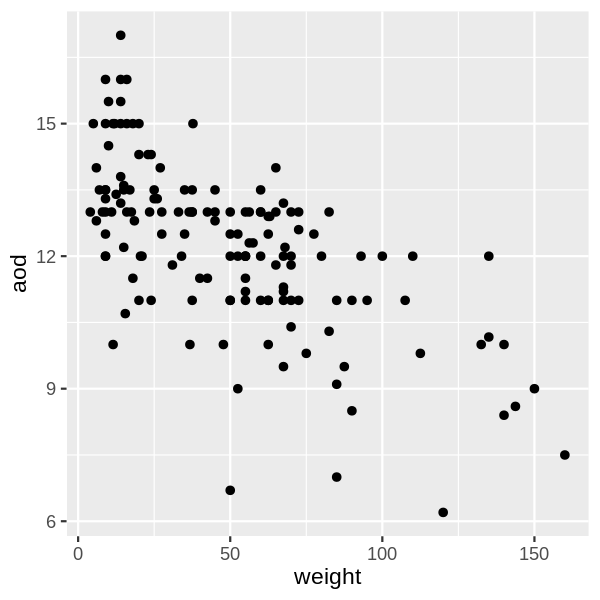

In [9]:
p <- ggplot(data = dogs,mapping = aes(x = weight,y = aod))
p <- ggplot_add(geom_point(),p)
p

Now for some more elegant code can accomplish the same thing. (This more
elegant code comes with a "for experts only" warning.)

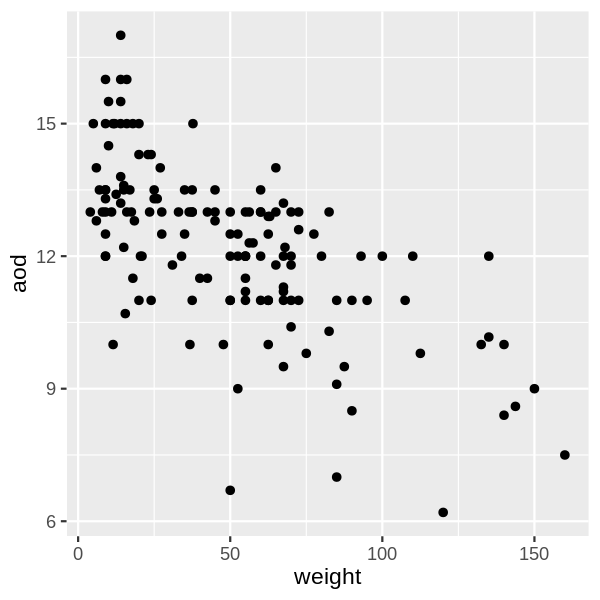

In [11]:
p <- ggplot(dogs,aes(x = weight,y = aod)) +
  geom_point()
p

For the moment I want to focus on the "uglier" code because it
highlights better the key elements of a ggplot2 plot:

1. The first input is the data (stored in a data frame).

2. The second input is an "aesthetic mapping", created using
   `aes` that defines how columns are mapped to features of the
   plot (axes, shapes, colors, *etc.*). *Note:* Many people use `aes`
   instead of `aes`.

3. A "geom", short for "geometric object", specifies the type of
   plot. ggplot2 has an excellent on-line reference at
   [ggplot2.tidyverse.org][ggplot2-reference] explaining all the
   "geoms", from bar charts to contour plots, with code examples for
   each.

4. ggplot2 outputs a *ggplot object* `p`, which can be drawn to the screen
   with `print(p)` or just `p` (then hit "enter" or "return").

The distinguishing feature of ggplot2 is that plots are created by
*adding layers*. This layering allows for infinite variety of plots to
be created. The layering approach means that ggplot2 is easily
extendible, and many R packages have been developed to enhance
ggplot2. (We will use two of these packages, ggrepel and cowplot.)